In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [23]:
df = pd.read_csv("tested.csv")

# Data cleaning

Fill missing values

In [ ]:
df.fillna({"Age": df["Age"].median(), "Fare": df["Fare"].median()}, inplace=True)

Create binary feature

In [ ]:
df["HasCabin"] = df["Cabin"].notnull().astype(int)

In [ ]:
df.drop(columns=["Cabin"], inplace=True)

# Basic checks

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
 11  HasCabin     418 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB
None


In [ ]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   29.599282    0.447368   
std     120.810458    0.481622    0.841838   12.703770    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   35.750000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare    HasCabin  
count  418.000000  418.000000  418.000000  
mean     0.392344   35.576535    0.217703  
std      0.981429   55.850103    0.413179  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.895800    0.000000  
50%      0.000000   14.454200    0.000000  
75%      0.000000   31.471875    0.000000  
max      9.000000

In [ ]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
HasCabin       0
dtype: int64


# Univariate analysis

/tmp/ipython-input-1924536637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="pastel")


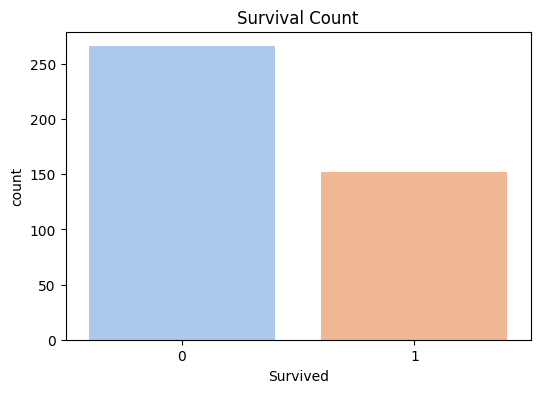

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df, palette="pastel")
plt.title("Survival Count")
plt.show()

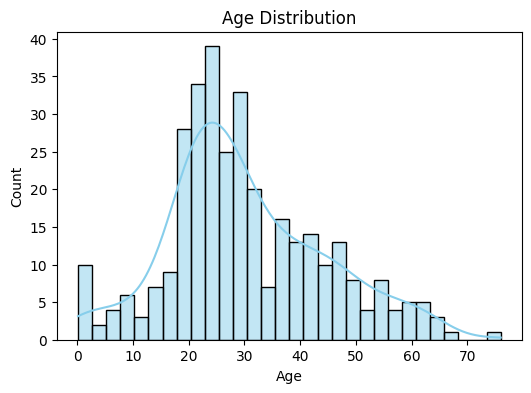

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], kde=True, bins=30, color="skyblue")
plt.title("Age Distribution")
plt.show()

/tmp/ipython-input-3750260886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass", data=df, palette="Set2")


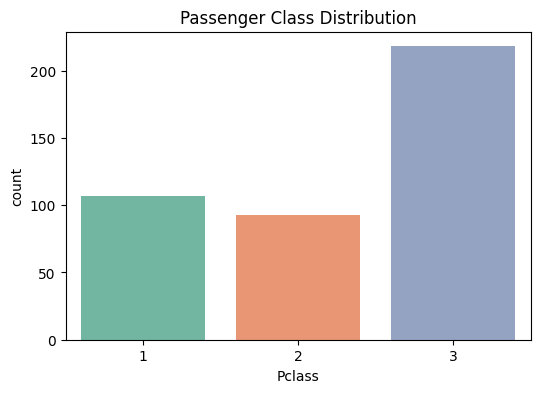

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", data=df, palette="Set2")
plt.title("Passenger Class Distribution")
plt.show()

/tmp/ipython-input-3589230641.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Embarked", data=df, palette="muted")


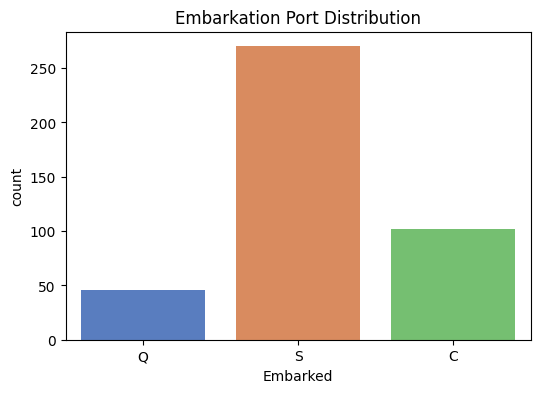

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x="Embarked", data=df, palette="muted")
plt.title("Embarkation Port Distribution")
plt.show()

# Bivariate Analysis

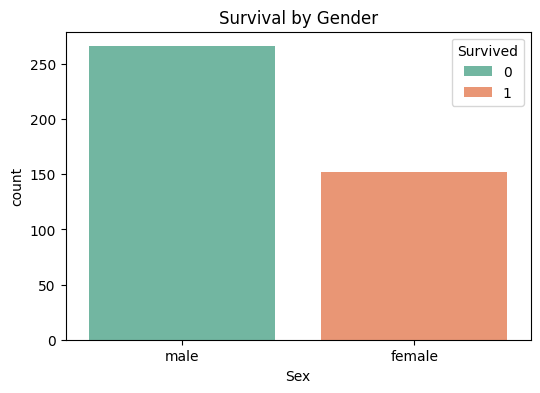

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df, palette="Set2")
plt.title("Survival by Gender")
plt.show()

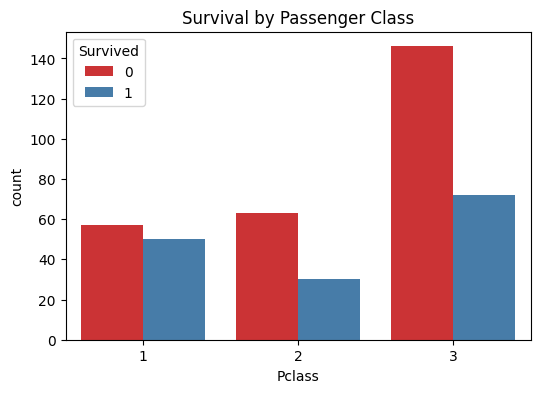

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df, palette="Set1")
plt.title("Survival by Passenger Class")
plt.show()

/tmp/ipython-input-2638631725.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Age", data=df, palette="coolwarm")


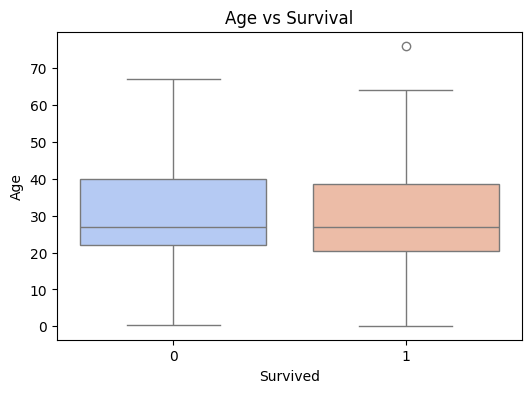

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="Age", data=df, palette="coolwarm")
plt.title("Age vs Survival")
plt.show()

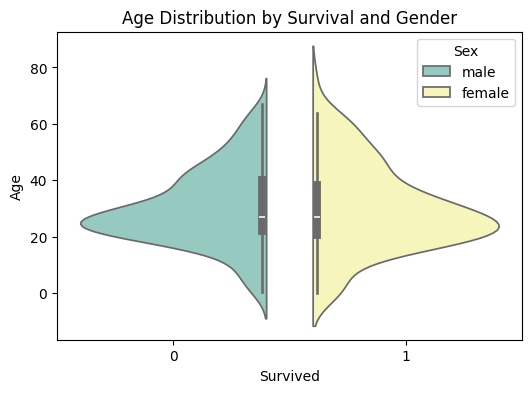

In [33]:
plt.figure(figsize=(6,4))
sns.violinplot(x="Survived", y="Age", hue="Sex", split=True, data=df, palette="Set3")
plt.title("Age Distribution by Survival and Gender")
plt.show()

# Multivariate analysis

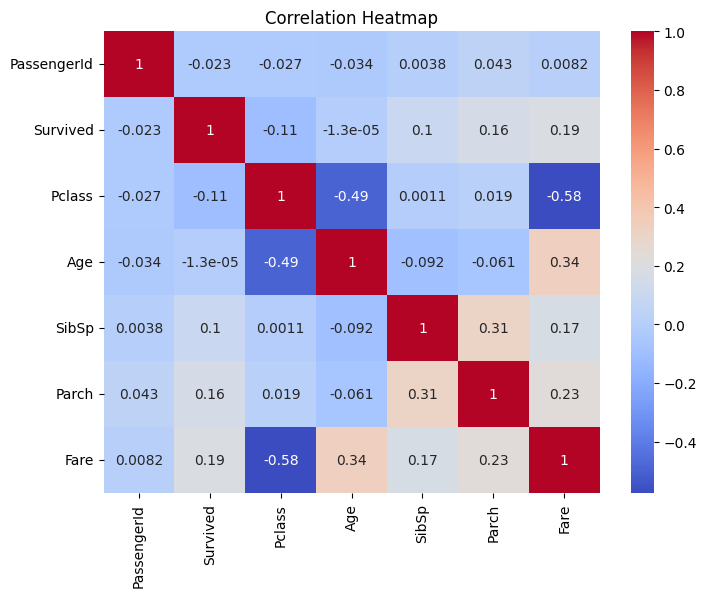

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

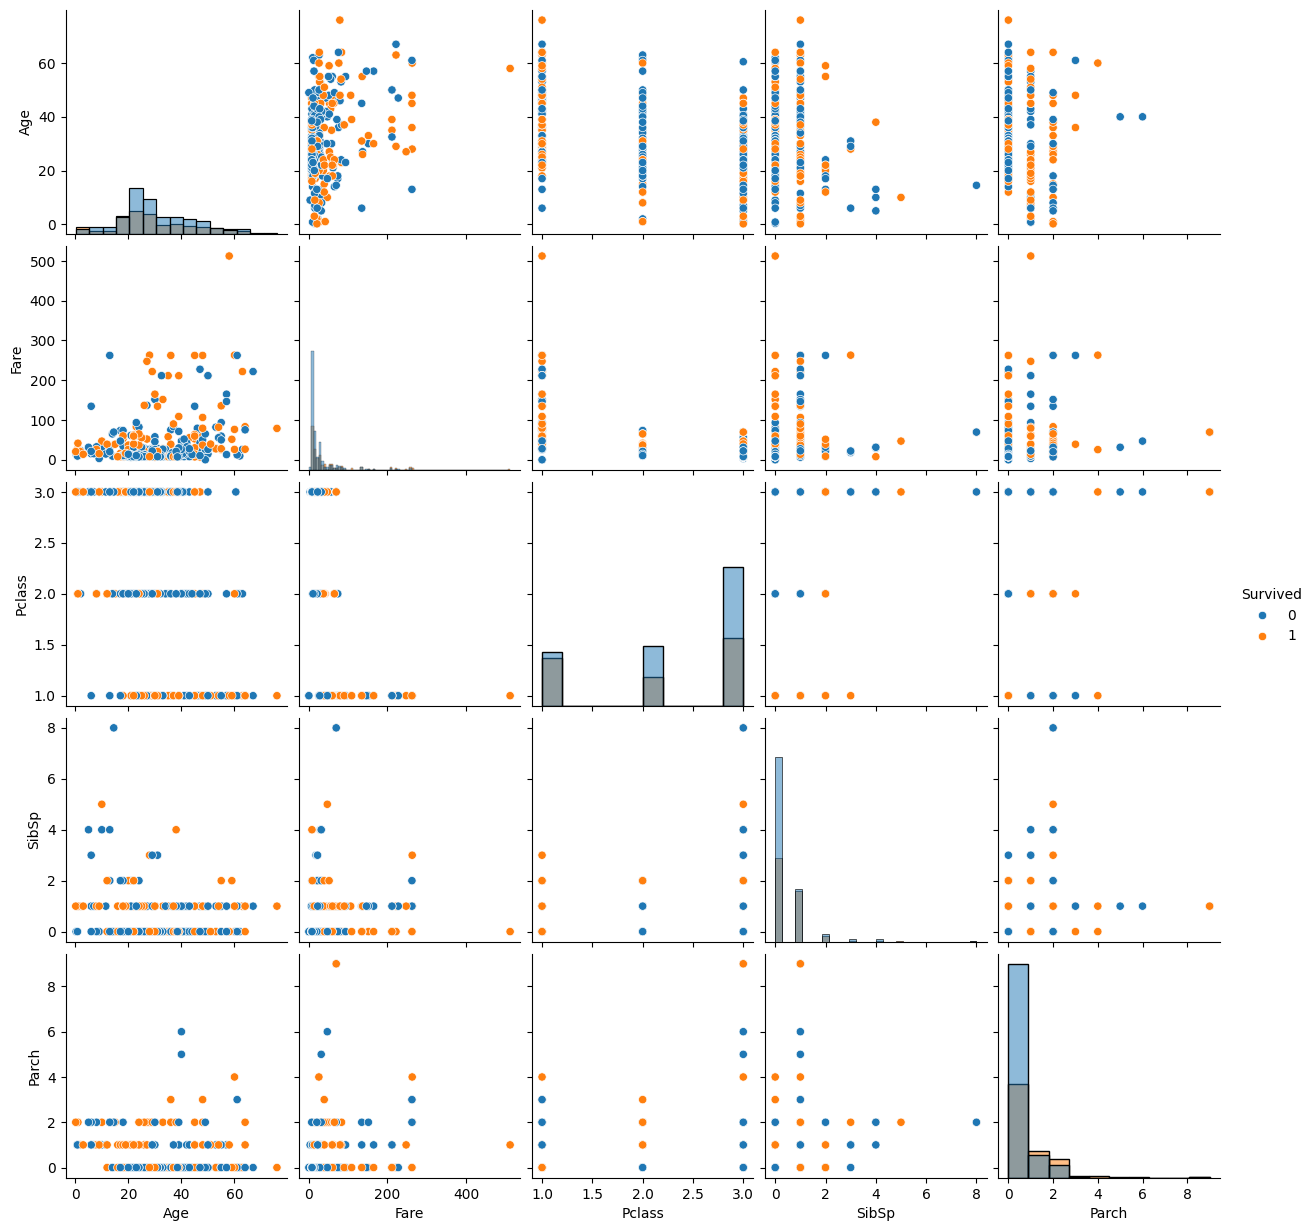

In [36]:
sns.pairplot(df[["Survived", "Age", "Fare", "Pclass", "SibSp", "Parch"]],
             hue="Survived", diag_kind="hist")
plt.show()

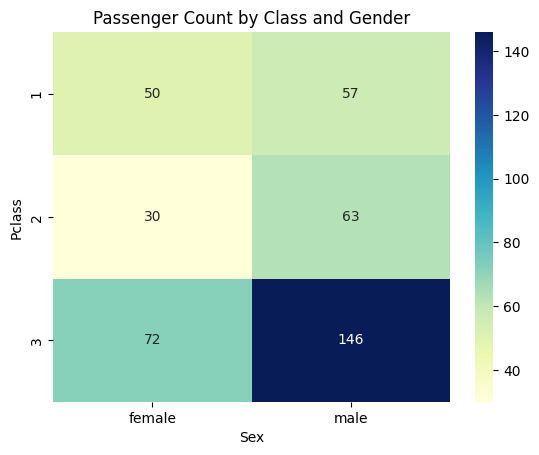

In [37]:
ct = pd.crosstab(df["Pclass"], df["Sex"])
sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Passenger Count by Class and Gender")
plt.show()

# Additional visuals

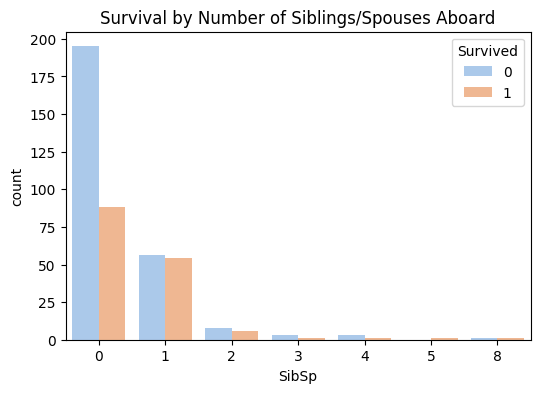

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(x="SibSp", hue="Survived", data=df, palette="pastel")
plt.title("Survival by Number of Siblings/Spouses Aboard")
plt.show()

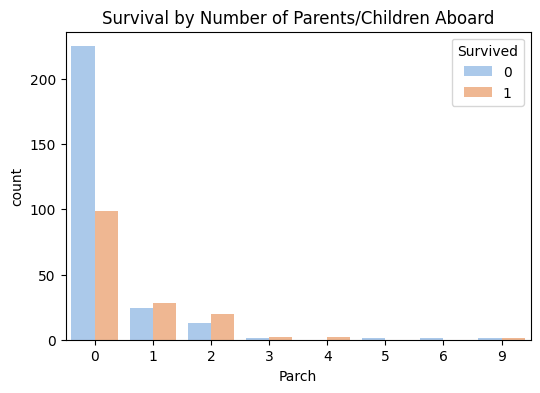

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x="Parch", hue="Survived", data=df, palette="pastel")
plt.title("Survival by Number of Parents/Children Aboard")
plt.show()